<a href="https://colab.research.google.com/github/hari40009/Python-for-Data-Science/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
#Load the data set
claimants = pd.read_csv("claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
# dropping the case number columns as it is not required
claimants.drop(["CASENUM"],inplace=True,axis = 1)

In [4]:
#Shape of the data set
claimants.shape

(1340, 6)

In [5]:
# Removing NA values in data set
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [6]:
# Dividing our data into input and output variables 
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]

In [7]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)
#Predict for X dataset
y_pred = classifier.predict(X)

In [8]:
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [9]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [10]:
y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [11]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[381 197]
 [123 395]]


In [12]:
((381+395)/(381+197+123+395))*100

70.8029197080292

In [13]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [14]:
# ROC Curve

Text(0, 0.5, 'True Positive Rate')

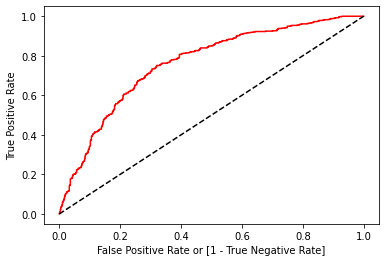

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [22]:
# roc_curve()

In [19]:
classifier.predict_proba (X)

array([[9.99996954e-01, 3.04621690e-06],
       [4.92851125e-01, 5.07148875e-01],
       [4.24833157e-01, 5.75166843e-01],
       ...,
       [2.60971335e-01, 7.39028665e-01],
       [7.14059407e-01, 2.85940593e-01],
       [3.19568787e-01, 6.80431213e-01]])

In [20]:
auc

0.7108589063606365

In [21]:
thresholds

array([1.79054593e+00, 7.90545935e-01, 7.87863385e-01, 7.80438455e-01,
       7.77395844e-01, 7.76462373e-01, 7.62275971e-01, 7.61429713e-01,
       7.53158678e-01, 7.51243537e-01, 7.48992067e-01, 7.47934566e-01,
       7.43891339e-01, 7.43489999e-01, 7.39028665e-01, 7.38313952e-01,
       7.35520206e-01, 7.34774649e-01, 7.33204355e-01, 7.32598687e-01,
       7.28818243e-01, 7.28598763e-01, 7.24064656e-01, 7.23091737e-01,
       7.21417349e-01, 7.20951087e-01, 7.20791088e-01, 7.20610901e-01,
       7.18246894e-01, 7.17902002e-01, 7.17597383e-01, 7.17060100e-01,
       7.16867628e-01, 7.15302513e-01, 7.12082039e-01, 7.11943596e-01,
       7.10388317e-01, 7.09792061e-01, 7.08524027e-01, 7.07806569e-01,
       7.03971943e-01, 7.03570516e-01, 7.03325374e-01, 7.03012024e-01,
       7.02442673e-01, 7.01803943e-01, 7.00108315e-01, 7.00037432e-01,
       6.99357008e-01, 6.99300941e-01, 6.98492330e-01, 6.98009381e-01,
       6.97704110e-01, 6.97361014e-01, 6.97356794e-01, 6.97233981e-01,
      